In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from skimage.util import random_noise
import cv2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

print(os.listdir(r"D:\kaggle"))
print(os.listdir(r"D:\kaggle\pic"))

['challenge-2019-train-vrd.csv', 'challenge-2019-validation-vrd.csv', 'open-images-2019-visual-relationship.zip', 'pic', 'redundant', 'visual_relationship', 'VRD_sample_submission.csv']
['test', 'test_kaggle', 'train', 'validate']


In [2]:
df_train = pd.read_csv(r'D:\kaggle\challenge-2019-train-vrd.csv')
df_validation = pd.read_csv(r'D:\kaggle\challenge-2019-validation-vrd.csv')
print('shape of train data frame:', df_train.shape)
print('shape of validation data frame:', df_validation.shape)

shape of train data frame: (374768, 12)
shape of validation data frame: (3991, 12)


In [3]:
"""import shutil
for name in df_train['ImageID']:
    try:
        shutil.move("D:\\kaggle\\pic\\train\\" + name + ".jpg", "D:\\relation\\pic\\train\\" + name + ".jpg")
    except:
        continue
    
import shutil
for name in df_validation['ImageID']:
    try:
        shutil.move("D:\\kaggle\\pic\\validate\\" + name + ".jpg", "D:\\relation\\pic\\validate\\" + name + ".jpg")
    except:
        continue"""

'import shutil\nfor name in df_train[\'ImageID\']:\n    try:\n        shutil.move("D:\\kaggle\\pic\\train\\" + name + ".jpg", "D:\\relation\\pic\\train\\" + name + ".jpg")\n    except:\n        continue\n    \nimport shutil\nfor name in df_validation[\'ImageID\']:\n    try:\n        shutil.move("D:\\kaggle\\pic\\validate\\" + name + ".jpg", "D:\\relation\\pic\\validate\\" + name + ".jpg")\n    except:\n        continue'

In [4]:
df_train.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [5]:
temp = df_train[df_train['XMax1']>1]['ImageID'].values
temp = np.concatenate((temp, df_train[df_train['XMax2']>1]['ImageID'].values), axis=0)
temp = np.concatenate((temp, df_train[df_train['YMax1']>1]['ImageID'].values), axis=0)
temp = np.concatenate((temp, df_train[df_train['YMax2']>1]['ImageID'].values), axis=0)

In [6]:
df_train['RelationshipLabel'].value_counts()
df_train = df_train.set_index('ImageID')

In [7]:
df_validation.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe600639ac5f36c1,/m/05r655,/m/0hg7b,0.360825,0.684831,0.132743,0.716814,0.466863,0.555228,0.351770,0.495575,holds
1,fe600639ac5f36c1,/m/03bt1vf,/m/0hg7b,0.363770,0.686303,0.130531,0.716814,0.466863,0.555228,0.351770,0.495575,holds
2,07bb1574590ad7fd,/m/01mzpv,/m/01y9k5,0.290625,0.510938,0.463466,0.906054,0.237500,0.489062,0.413361,0.843424,at
3,07bb1574590ad7fd,/m/01mzpv,/m/01y9k5,0.090625,0.175000,0.594990,0.970772,0.089062,0.235938,0.409186,0.847599,at
4,07bb1574590ad7fd,/m/01mzpv,/m/01y9k5,0.751562,0.917188,0.444676,0.784969,0.656250,0.835938,0.419624,0.759916,at


In [8]:
df_validation['RelationshipLabel'].value_counts()

is                2573
at                 648
on                 274
holds              235
interacts_with     112
plays               66
inside_of           61
wears               14
hits                 7
under                1
Name: RelationshipLabel, dtype: int64

In [9]:
import numpy as np
test = np.array([])
test=np.append(test, df_validation['LabelName1'])
test=np.append(test, df_validation['LabelName2'])
test=np.append(test, df_train['LabelName1'])
test=np.append(test, df_train['LabelName2'])

In [10]:
print(np.unique(test).size)

62


In [11]:
numerical = ['XMin1', 'XMax1', 'YMin1', 'YMax1', 'XMin2', 'XMax2', 'YMin2', 'YMax2']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD8AB55588>,
      dtype=object)

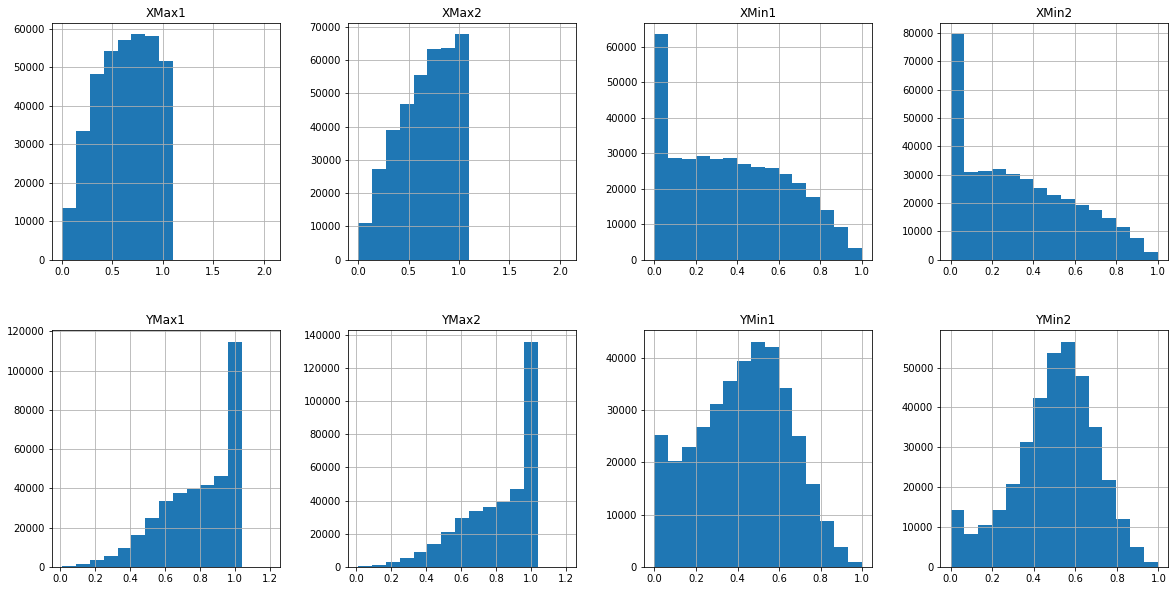

In [12]:
df_train[numerical].hist(bins=15, figsize=(20, 10), layout=(2, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD8AD3C828>,
      dtype=object)

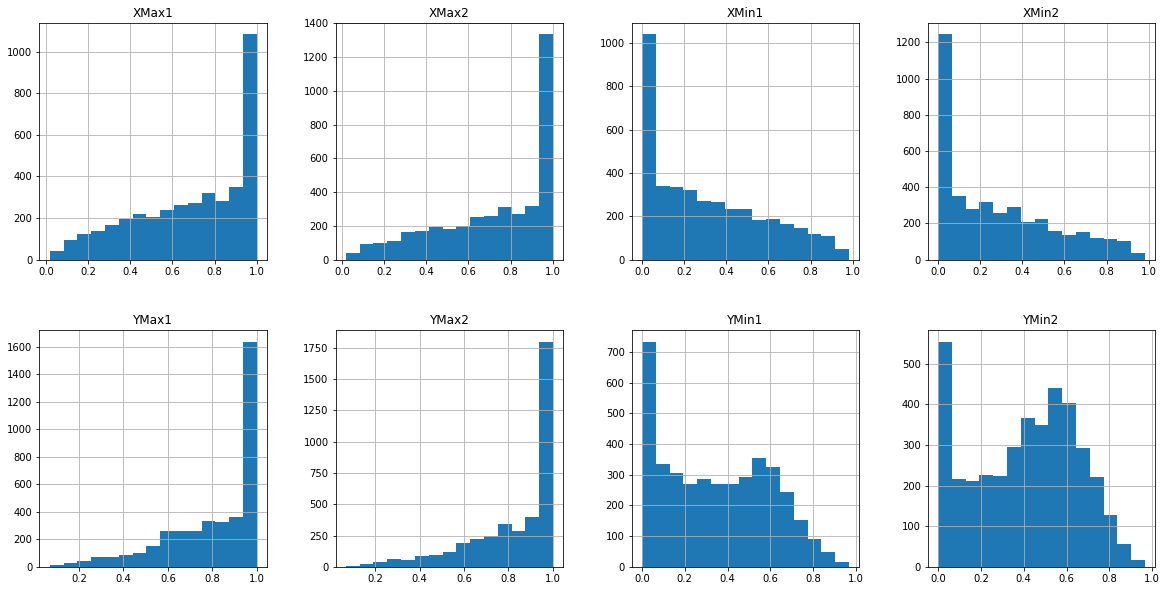

In [13]:
df_validation[numerical].hist(bins=15, figsize=(20, 10), layout=(2, 4))

In [14]:
df_sample = pd.read_csv(r"D:\kaggle\VRD_sample_submission.csv")
print('shape of sample submission data frame:', df_sample.shape)

shape of sample submission data frame: (99999, 2)


In [15]:
df_sample.head()

,ImageId,PredictionString
0,21135d5ed0e7a0b7,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
1,763c72626bf24534,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
2,7540c162180973b1,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
3,c4e522dce52cb02f,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...
4,cafcd9496c808085,0.037432 /m/03bt1vf 0.549840 0.603769 0.814588...


In [16]:
values_what = df_sample[df_sample['ImageId']=='b4c3b52a8723d431']['PredictionString'].values
values = str(values_what)[2:-2].split(' ')

print('confidence: ', values[0])

print('label 1: ', values[1])
print('XMin1: ', values[2])
print('YMin1: ', values[3])
print('XMax1: ', values[4])
print('YMax1: ', values[5])
print('Label 2: ', values[6])
print('XMin2: ', values[7])
print('YMin2: ', values[8])
print('XMax2: ', values[9])
print('YMax2: ', values[10])
print('Relation Label: ', values[11])

confidence:  0.037432
label 1:  /m/03bt1vf
XMin1:  0.549840
YMin1:  0.603769
XMax1:  0.814588
YMax1:  0.999519
Label 2:  /m/01mzp
XMin2:  0.187824
YMin2:  0.454496
XMax2:  0.245905
YMax2:  0.554354
Relation Label:  on


In [17]:
print('confidence: ', values[12])
print('label 1: ', values[13])
print('XMin1: ', values[14])
print('YMin1: ', values[15])
print('XMax1: ', values[16])
print('YMax1: ', values[17])
print('Label 2: ', values[18])
print('XMin2: ', values[19])
print('YMin2: ', values[20])
print('XMax2: ', values[21])
print('YMax2: ', values[22])
print('Relation Label: ', values[23])

confidence:  0.044382
label 1:  /m/03bt1vf
XMin1:  0.549840
YMin1:  0.603769
XMax1:  0.814588
YMax1:  0.999519
Label 2:  /m/01mzpv
XMin2:  0.174735
YMin2:  0.468313
XMax2:  0.238807
YMax2:  0.562794
Relation Label:  on


In [18]:
labels = np.unique(test)
label_dict = {label: idx for idx, label in enumerate(labels)}
relation = df_train['RelationshipLabel'].unique()
relation_dict = {label: idx for idx, label in enumerate(relation)}

In [19]:
df_train[df_train.index=='0000201cd362f303']

,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
ImageID,,,,,,,,,,,
0000201cd362f303,/m/026t6,/m/083vt,0.16375,0.208750,0.499062,0.545028,0.16375,0.208750,0.499062,0.545028,is
0000201cd362f303,/m/026t6,/m/083vt,0.10625,0.161250,0.456848,0.530019,0.10625,0.161250,0.456848,0.530019,is
0000201cd362f303,/m/0342h,/m/083vt,0.70875,0.808125,0.355535,0.450281,0.70875,0.808125,0.355535,0.450281,is


In [20]:
import os 
import tensorflow as tf 
from PIL import Image  

#图片路径
cwd = 'D:\\relation\\pic\\train\\'
#文件路径
filepath = 'D:\\relation\\pic\\'
#存放图片个数
bestnum = 1280
#第几个图片
num = 0
#第几个TFRecord文件
recordfilenum = 0
#tfrecords格式文件名
writer = None
#tfrecordfilename = ("traindata_train_%.3d.tfrecords" % recordfilenum)
#writer= tf.python_io.TFRecordWriter(filepath+tfrecordfilename)
target = [19, 31, 43, 50, 58, 60]

for img_name in os.listdir(cwd): 
    num=num+1
    df_labels = df_train[df_train.index==img_name[:-4]]
    img_format = img_name.split('.')[-1]
    if num>bestnum:
        num = 1
        recordfilenum = recordfilenum + 1
        #tfrecords格式文件名
        #tfrecordfilename = ("traindata_train_%.3d.tfrecords" % recordfilenum)
        #writer= tf.python_io.TFRecordWriter(filepath+tfrecordfilename)
        
    if recordfilenum in target:
        if num == 1:
            tfrecordfilename = ("traindata_train_new_%.3d.tfrecords" % recordfilenum)
            writer = tf.python_io.TFRecordWriter(filepath+tfrecordfilename)
    else:
        continue
        
    if img_name[:-4] in temp:
        continue
            
    img_path = cwd+img_name
    #img=Image.open(img_path,'r')
    img = tf.gfile.FastGFile(img_path, 'rb').read()
    image_jpg = None
    with tf.Session() as sess:  
        image_jpg = tf.image.decode_jpeg(img)
        image_jpg = sess.run(image_jpg)
    
    #size = img.size
    #channel = len(img.split())
    """if image_jpg.shape[2] != 3:
        continue"""
        
    #print(size[1],size[0])
    #print(size)
    #print(img.mode)
    #img_raw=img.tobytes()
    #..................        
    xmin = []
    ymin = []
    xmax = []
    ymax = []
    bboxes = []
    labels = []
    relations = []
    for data in df_labels.iterrows():
        data = data[1]
        bboxes.append([data['YMin1'], data['XMin1'], data['YMax1'], data['XMax1']])
        bboxes.append([data['YMin2'], data['XMin2'], data['YMax2'], data['XMax2']])
        labels.append(label_dict[data['LabelName1']])
        labels.append(label_dict[data['LabelName2']])
        relations.append(relation_dict[data['RelationshipLabel']])
            
    for b in bboxes:
        assert len(b) == 4
        [l.append(point) for l, point in zip([ymin, xmin, ymax, xmax], b)]
            
    example = tf.train.Example(features=tf.train.Features(feature={
        #'image/height': tf.train.Feature(int64_list=tf.train.Int64List(value=[size[1]])),
        #'image/width': tf.train.Feature(int64_list=tf.train.Int64List(value=[size[0]])),
        #'image/channels': tf.train.Feature(int64_list=tf.train.Int64List(value=[channel])),
        'image/shape': tf.train.Feature(int64_list=tf.train.Int64List(value=image_jpg.shape)),
        'image/format': tf.train.Feature(bytes_list=tf.train.BytesList(value=[str.encode(img_format)])),
        'image/object/bbox/xmin': tf.train.Feature(float_list=tf.train.FloatList(value=xmin)),
        'image/object/bbox/xmax': tf.train.Feature(float_list=tf.train.FloatList(value=xmax)),
        'image/object/bbox/ymin': tf.train.Feature(float_list=tf.train.FloatList(value=ymin)),
        'image/object/bbox/ymax': tf.train.Feature(float_list=tf.train.FloatList(value=ymax)),
        'image/object/bbox/label': tf.train.Feature(int64_list=tf.train.Int64List(value=labels)),
        'image/object/bbox/relation': tf.train.Feature(int64_list=tf.train.Int64List(value=relations)),
        'image/encoded': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img]))}))
    writer.write(example.SerializeToString())
writer.close()

W0828 01:30:04.306092 14452 deprecation.py:323] From <ipython-input-20-96d0fcb83bea>:44: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


In [ ]:
image_filenames = os.listdir(r"D:\kaggle\pic\test")

import random
for i in range(2):
    index = random.randrange(len(image_filenames))
    path = r"D:\kaggle\pic\test" + "\\" + image_filenames[index]
    src_img = cv2.imread(path)
    fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
import tensorflow as tf

def img_batch_idx(num_images):
    indices = np.arange(num_images)
    np.random.shuffle(indices)
    return indices

train_size = df_train.shape[0]
validate_size = df_validation.shape[0]

In [ ]:
flip_img = tf.image.flip_left_right(image)
trans_img = tf.contrib.image.translate(image, traslation=[10, 10])
bright_img = tf.image.adjust_brightness(image, 0.2)
contrast_img = tf.image.adjust_contrast(image, contrast_factor=0.6)
satu_img = tf.image.adjust_saturation(image, 5)
hue_img = tf.image.adjust_hue(image, delta=0.4)

noise_img = random_noise(image, mode='gaussian', var=0.01)

In [ ]:
import math
from collections import namedtuple

import numpy as np
import tensorflow as tf

import tf_extended as tfe
from nets import custom_layers
from nets import ssd_common

slim = tf.contrib.slim


SSDParams = namedtuple('SSDParameters', ['img_shape',
                                         'num_classes',
                                         'no_annotation_label',
                                         'feat_layers',
                                         'feat_shapes',
                                         'anchor_size_bounds',
                                         'anchor_sizes',
                                         'anchor_ratios',
                                         'anchor_steps',
                                         'anchor_offset',
                                         'normalizations',
                                         'prior_scaling'
                                         ])


In [ ]:
class SSDNet(object):
    """Implementation of the SSD VGG-based 300 network.
    The default features layers with 300x300 image input are:
      conv4 ==> 38 x 38
      conv7 ==> 19 x 19
      conv8 ==> 10 x 10
      conv9 ==> 5 x 5
      conv10 ==> 3 x 3
      conv11 ==> 1 x 1
    The default image size used to train this network is 300x300.
    """
    default_params = SSDParams(
        img_shape=(300, 300),
        num_classes=21,
        no_annotation_label=21,
        feat_layers=['block4', 'block7', 'block8', 'block9', 'block10', 'block11'],
        feat_shapes=[(38, 38), (19, 19), (10, 10), (5, 5), (3, 3), (1, 1)],
        anchor_size_bounds=[0.15, 0.90],
        # anchor_size_bounds=[0.20, 0.90],
        anchor_sizes=[(21., 45.),
                      (45., 99.),
                      (99., 153.),
                      (153., 207.),
                      (207., 261.),
                      (261., 315.)],
        # anchor_sizes=[(30., 60.),
        #               (60., 111.),
        #               (111., 162.),
        #               (162., 213.),
        #               (213., 264.),
        #               (264., 315.)],
        anchor_ratios=[[2, .5],
                       [2, .5, 3, 1./3],
                       [2, .5, 3, 1./3],
                       [2, .5, 3, 1./3],
                       [2, .5],
                       [2, .5]],
        anchor_steps=[8, 16, 32, 64, 100, 300],
        anchor_offset=0.5,
        normalizations=[20, -1, -1, -1, -1, -1],
        prior_scaling=[0.1, 0.1, 0.2, 0.2]
        )

    def __init__(self, params=None):
        """Init the SSD net with some parameters. Use the default ones
        if none provided.
        """
        if isinstance(params, SSDParams):
            self.params = params
        else:
            self.params = SSDNet.default_params

    # ======================================================================= #
    def net(self, inputs,
            is_training=True,
            update_feat_shapes=True,
            dropout_keep_prob=0.5,
            prediction_fn=slim.softmax,
            reuse=None,
            scope='ssd_300_vgg'):
        """SSD network definition.
        """
        r = ssd_net(inputs,
                    num_classes=self.params.num_classes,
                    feat_layers=self.params.feat_layers,
                    anchor_sizes=self.params.anchor_sizes,
                    anchor_ratios=self.params.anchor_ratios,
                    normalizations=self.params.normalizations,
                    is_training=is_training,
                    dropout_keep_prob=dropout_keep_prob,
                    prediction_fn=prediction_fn,
                    reuse=reuse,
                    scope=scope)
        # Update feature shapes (try at least!)
        if update_feat_shapes:
            shapes = ssd_feat_shapes_from_net(r[0], self.params.feat_shapes)
            self.params = self.params._replace(feat_shapes=shapes)
        return r

    def arg_scope(self, weight_decay=0.0005, data_format='NHWC'):
        """Network arg_scope.
        """
        return ssd_arg_scope(weight_decay, data_format=data_format)

    def arg_scope_caffe(self, caffe_scope):
        """Caffe arg_scope used for weights importing.
        """
        return ssd_arg_scope_caffe(caffe_scope)

    # ======================================================================= #
    def update_feature_shapes(self, predictions):
        """Update feature shapes from predictions collection (Tensor or Numpy
        array).
        """
        shapes = ssd_feat_shapes_from_net(predictions, self.params.feat_shapes)
        self.params = self.params._replace(feat_shapes=shapes)

    def anchors(self, img_shape, dtype=np.float32):
        """Compute the default anchor boxes, given an image shape.
        """
        return ssd_anchors_all_layers(img_shape,
                                      self.params.feat_shapes,
                                      self.params.anchor_sizes,
                                      self.params.anchor_ratios,
                                      self.params.anchor_steps,
                                      self.params.anchor_offset,
                                      dtype)

    def bboxes_encode(self, labels, bboxes, anchors,
                      scope=None):
        """Encode labels and bounding boxes.
        """
        return ssd_common.tf_ssd_bboxes_encode(
            labels, bboxes, anchors,
            self.params.num_classes,
            self.params.no_annotation_label,
            ignore_threshold=0.5,
            prior_scaling=self.params.prior_scaling,
            scope=scope)

    def bboxes_decode(self, feat_localizations, anchors,
                      scope='ssd_bboxes_decode'):
        """Encode labels and bounding boxes.
        """
        return ssd_common.tf_ssd_bboxes_decode(
            feat_localizations, anchors,
            prior_scaling=self.params.prior_scaling,
            scope=scope)

    def detected_bboxes(self, predictions, localisations,
                        select_threshold=None, nms_threshold=0.5,
                        clipping_bbox=None, top_k=400, keep_top_k=200):
        """Get the detected bounding boxes from the SSD network output.
        """
        # Select top_k bboxes from predictions, and clip
        rscores, rbboxes = \
            ssd_common.tf_ssd_bboxes_select(predictions, localisations,
                                            select_threshold=select_threshold,
                                            num_classes=self.params.num_classes)
        rscores, rbboxes = \
            tfe.bboxes_sort(rscores, rbboxes, top_k=top_k)
        # Apply NMS algorithm.
        rscores, rbboxes = \
            tfe.bboxes_nms_batch(rscores, rbboxes,
                                 nms_threshold=nms_threshold,
                                 keep_top_k=keep_top_k)
        if clipping_bbox is not None:
            rbboxes = tfe.bboxes_clip(clipping_bbox, rbboxes)
        return rscores, rbboxes

    def losses(self, logits, localisations,
               gclasses, glocalisations, gscores,
               match_threshold=0.5,
               negative_ratio=3.,
               alpha=1.,
               label_smoothing=0.,
               scope='ssd_losses'):
        return ssd_losses(logits, localisations,
                          gclasses, glocalisations, gscores,
                          match_threshold=match_threshold,
                          negative_ratio=negative_ratio,
                          alpha=alpha,
                          label_smoothing=label_smoothing,
                          scope=scope)

In [ ]:
def ssd_size_bounds_to_values(size_bounds,
                              n_feat_layers,
                              img_shape=(300, 300)):
    """Compute the reference sizes of the anchor boxes from relative bounds.
    The absolute values are measured in pixels, based on the network
    default size (300 pixels).
    This function follows the computation performed in the original
    implementation of SSD in Caffe.
    Return:
      list of list containing the absolute sizes at each scale. For each scale,
      the ratios only apply to the first value.
    """
    assert img_shape[0] == img_shape[1]

    img_size = img_shape[0]
    min_ratio = int(size_bounds[0] * 100)
    max_ratio = int(size_bounds[1] * 100)
    step = int(math.floor((max_ratio - min_ratio) / (n_feat_layers - 2)))
    # Start with the following smallest sizes.
    sizes = [[img_size * size_bounds[0] / 2, img_size * size_bounds[0]]]
    for ratio in range(min_ratio, max_ratio + 1, step):
        sizes.append((img_size * ratio / 100.,
                      img_size * (ratio + step) / 100.))
    return sizes

In [ ]:
def ssd_feat_shapes_from_net(predictions, default_shapes=None):
    """Try to obtain the feature shapes from the prediction layers. The latter
    can be either a Tensor or Numpy ndarray.
    Return:
      list of feature shapes. Default values if predictions shape not fully
      determined.
    """
    feat_shapes = []
    for l in predictions:
        # Get the shape, from either a np array or a tensor.
        if isinstance(l, np.ndarray):
            shape = l.shape
        else:
            shape = l.get_shape().as_list()
        shape = shape[1:4]
        # Problem: undetermined shape...
        if None in shape:
            return default_shapes
        else:
            feat_shapes.append(shape)
    return feat_shapes

In [ ]:
def ssd_anchor_one_layer(img_shape,
                         feat_shape,
                         sizes,
                         ratios,
                         step,
                         offset=0.5,
                         dtype=np.float32):
    """Computer SSD default anchor boxes for one feature layer.
    Determine the relative position grid of the centers, and the relative
    width and height.
    Arguments:
      feat_shape: Feature shape, used for computing relative position grids;
      size: Absolute reference sizes;
      ratios: Ratios to use on these features;
      img_shape: Image shape, used for computing height, width relatively to the
        former;
      offset: Grid offset.
    Return:
      y, x, h, w: Relative x and y grids, and height and width.
    """
    # Compute the position grid: simple way.
    # y, x = np.mgrid[0:feat_shape[0], 0:feat_shape[1]]
    # y = (y.astype(dtype) + offset) / feat_shape[0]
    # x = (x.astype(dtype) + offset) / feat_shape[1]
    # Weird SSD-Caffe computation using steps values...
    y, x = np.mgrid[0:feat_shape[0], 0:feat_shape[1]]
    y = (y.astype(dtype) + offset) * step / img_shape[0]
    x = (x.astype(dtype) + offset) * step / img_shape[1]

    # Expand dims to support easy broadcasting.
    y = np.expand_dims(y, axis=-1)
    x = np.expand_dims(x, axis=-1)

    # Compute relative height and width.
    # Tries to follow the original implementation of SSD for the order.
    num_anchors = len(sizes) + len(ratios)
    h = np.zeros((num_anchors, ), dtype=dtype)
    w = np.zeros((num_anchors, ), dtype=dtype)
    # Add first anchor boxes with ratio=1.
    h[0] = sizes[0] / img_shape[0]
    w[0] = sizes[0] / img_shape[1]
    di = 1
    if len(sizes) > 1:
        h[1] = math.sqrt(sizes[0] * sizes[1]) / img_shape[0]
        w[1] = math.sqrt(sizes[0] * sizes[1]) / img_shape[1]
        di += 1
    for i, r in enumerate(ratios):
        h[i+di] = sizes[0] / img_shape[0] / math.sqrt(r)
        w[i+di] = sizes[0] / img_shape[1] * math.sqrt(r)
    return y, x, h, w

In [ ]:
def ssd_anchors_all_layers(img_shape,
                           layers_shape,
                           anchor_sizes,
                           anchor_ratios,
                           anchor_steps,
                           offset=0.5,
                           dtype=np.float32):
    """Compute anchor boxes for all feature layers.
    """
    layers_anchors = []
    for i, s in enumerate(layers_shape):
        anchor_bboxes = ssd_anchor_one_layer(img_shape, s,
                                             anchor_sizes[i],
                                             anchor_ratios[i],
                                             anchor_steps[i],
                                             offset=offset, dtype=dtype)
        layers_anchors.append(anchor_bboxes)
    return layers_anchors

In [ ]:
def tensor_shape(x, rank=3):
    """Returns the dimensions of a tensor.
    Args:
      image: A N-D Tensor of shape.
    Returns:
      A list of dimensions. Dimensions that are statically known are python
        integers,otherwise they are integer scalar tensors.
    """
    if x.get_shape().is_fully_defined():
        return x.get_shape().as_list()
    else:
        static_shape = x.get_shape().with_rank(rank).as_list()
        dynamic_shape = tf.unstack(tf.shape(x), rank)
        return [s if s is not None else d
                for s, d in zip(static_shape, dynamic_shape)]

In [ ]:
def ssd_multibox_layer(inputs,
                       num_classes,
                       sizes,
                       ratios=[1],
                       normalization=-1,
                       bn_normalization=False):
    """Construct a multibox layer, return a class and localization predictions.
    """
    net = inputs
    if normalization > 0:
        net = custom_layers.l2_normalization(net, scaling=True)
    # Number of anchors.
    num_anchors = len(sizes) + len(ratios)

    # Location.
    num_loc_pred = num_anchors * 4
    loc_pred = slim.conv2d(net, num_loc_pred, [3, 3], activation_fn=None,
                           scope='conv_loc')
    loc_pred = custom_layers.channel_to_last(loc_pred)
    loc_pred = tf.reshape(loc_pred,
                          tensor_shape(loc_pred, 4)[:-1]+[num_anchors, 4])
    # Class prediction.
    num_cls_pred = num_anchors * num_classes
    cls_pred = slim.conv2d(net, num_cls_pred, [3, 3], activation_fn=None,
                           scope='conv_cls')
    cls_pred = custom_layers.channel_to_last(cls_pred)
    cls_pred = tf.reshape(cls_pred,
                          tensor_shape(cls_pred, 4)[:-1]+[num_anchors, num_classes])
    return cls_pred, loc_pred

In [ ]:
def ssd_net(inputs,
            num_classes=SSDNet.default_params.num_classes,
            feat_layers=SSDNet.default_params.feat_layers,
            anchor_sizes=SSDNet.default_params.anchor_sizes,
            anchor_ratios=SSDNet.default_params.anchor_ratios,
            normalizations=SSDNet.default_params.normalizations,
            is_training=True,
            dropout_keep_prob=0.5,
            prediction_fn=slim.softmax,
            reuse=None,
            scope='ssd_300_vgg'):
    """SSD net definition.
    """
    # if data_format == 'NCHW':
    #     inputs = tf.transpose(inputs, perm=(0, 3, 1, 2))

    # End_points collect relevant activations for external use.
    end_points = {}
    with tf.variable_scope(scope, 'ssd_300_vgg', [inputs], reuse=reuse):
        # Original VGG-16 blocks.
        net = slim.repeat(inputs, 2, slim.conv2d, 64, [3, 3], scope='conv1')
        end_points['block1'] = net
        net = slim.max_pool2d(net, [2, 2], scope='pool1')
        # Block 2.
        net = slim.repeat(net, 2, slim.conv2d, 128, [3, 3], scope='conv2')
        end_points['block2'] = net
        net = slim.max_pool2d(net, [2, 2], scope='pool2')
        # Block 3.
        net = slim.repeat(net, 3, slim.conv2d, 256, [3, 3], scope='conv3')
        end_points['block3'] = net
        net = slim.max_pool2d(net, [2, 2], scope='pool3')
        # Block 4.
        net = slim.repeat(net, 3, slim.conv2d, 512, [3, 3], scope='conv4')
        end_points['block4'] = net
        net = slim.max_pool2d(net, [2, 2], scope='pool4')
        # Block 5.
        net = slim.repeat(net, 3, slim.conv2d, 512, [3, 3], scope='conv5')
        end_points['block5'] = net
        net = slim.max_pool2d(net, [3, 3], stride=1, scope='pool5')

        # Additional SSD blocks.
        # Block 6: let's dilate the hell out of it!
        net = slim.conv2d(net, 1024, [3, 3], rate=6, scope='conv6')
        end_points['block6'] = net
        net = tf.layers.dropout(net, rate=dropout_keep_prob, training=is_training)
        # Block 7: 1x1 conv. Because the fuck.
        net = slim.conv2d(net, 1024, [1, 1], scope='conv7')
        end_points['block7'] = net
        net = tf.layers.dropout(net, rate=dropout_keep_prob, training=is_training)

        # Block 8/9/10/11: 1x1 and 3x3 convolutions stride 2 (except lasts).
        end_point = 'block8'
        with tf.variable_scope(end_point):
            net = slim.conv2d(net, 256, [1, 1], scope='conv1x1')
            net = custom_layers.pad2d(net, pad=(1, 1))
            net = slim.conv2d(net, 512, [3, 3], stride=2, scope='conv3x3', padding='VALID')
        end_points[end_point] = net
        end_point = 'block9'
        with tf.variable_scope(end_point):
            net = slim.conv2d(net, 128, [1, 1], scope='conv1x1')
            net = custom_layers.pad2d(net, pad=(1, 1))
            net = slim.conv2d(net, 256, [3, 3], stride=2, scope='conv3x3', padding='VALID')
        end_points[end_point] = net
        end_point = 'block10'
        with tf.variable_scope(end_point):
            net = slim.conv2d(net, 128, [1, 1], scope='conv1x1')
            net = slim.conv2d(net, 256, [3, 3], scope='conv3x3', padding='VALID')
        end_points[end_point] = net
        end_point = 'block11'
        with tf.variable_scope(end_point):
            net = slim.conv2d(net, 128, [1, 1], scope='conv1x1')
            net = slim.conv2d(net, 256, [3, 3], scope='conv3x3', padding='VALID')
        end_points[end_point] = net

        # Prediction and localisations layers.
        predictions = []
        logits = []
        localisations = []
        for i, layer in enumerate(feat_layers):
            with tf.variable_scope(layer + '_box'):
                p, l = ssd_multibox_layer(end_points[layer],
                                          num_classes,
                                          anchor_sizes[i],
                                          anchor_ratios[i],
                                          normalizations[i])
            predictions.append(prediction_fn(p))
            logits.append(p)
            localisations.append(l)

        return predictions, localisations, logits, end_points

In [ ]:
ssd_net.default_image_size = 300

def ssd_arg_scope(weight_decay=0.0005, data_format='NHWC'):
    """Defines the VGG arg scope.
    Args:
      weight_decay: The l2 regularization coefficient.
    Returns:
      An arg_scope.
    """
    with slim.arg_scope([slim.conv2d, slim.fully_connected],
                        activation_fn=tf.nn.relu,
                        weights_regularizer=slim.l2_regularizer(weight_decay),
                        weights_initializer=tf.contrib.layers.xavier_initializer(),
                        biases_initializer=tf.zeros_initializer()):
        with slim.arg_scope([slim.conv2d, slim.max_pool2d],
                            padding='SAME',
                            data_format=data_format):
            with slim.arg_scope([custom_layers.pad2d,
                                 custom_layers.l2_normalization,
                                 custom_layers.channel_to_last],
                                data_format=data_format) as sc:
                return sc

In [ ]:
def ssd_arg_scope_caffe(caffe_scope):
    """Caffe scope definition.
    Args:
      caffe_scope: Caffe scope object with loaded weights.
    Returns:
      An arg_scope.
    """
    # Default network arg scope.
    with slim.arg_scope([slim.conv2d],
                        activation_fn=tf.nn.relu,
                        weights_initializer=caffe_scope.conv_weights_init(),
                        biases_initializer=caffe_scope.conv_biases_init()):
        with slim.arg_scope([slim.fully_connected],
                            activation_fn=tf.nn.relu):
            with slim.arg_scope([custom_layers.l2_normalization],
                                scale_initializer=caffe_scope.l2_norm_scale_init()):
                with slim.arg_scope([slim.conv2d, slim.max_pool2d],
                                    padding='SAME') as sc:
                    return sc

In [ ]:
def ssd_losses(logits, localisations,
               gclasses, glocalisations, gscores,
               match_threshold=0.5,
               negative_ratio=3.,
               alpha=1.,
               label_smoothing=0.,
               device='/cpu:0',
               scope=None):
    with tf.name_scope(scope, 'ssd_losses'):
        lshape = tfe.get_shape(logits[0], 5)
        num_classes = lshape[-1]
        batch_size = lshape[0]

        # Flatten out all vectors!
        flogits = []
        fgclasses = []
        fgscores = []
        flocalisations = []
        fglocalisations = []
        for i in range(len(logits)):
            flogits.append(tf.reshape(logits[i], [-1, num_classes]))
            fgclasses.append(tf.reshape(gclasses[i], [-1]))
            fgscores.append(tf.reshape(gscores[i], [-1]))
            flocalisations.append(tf.reshape(localisations[i], [-1, 4]))
            fglocalisations.append(tf.reshape(glocalisations[i], [-1, 4]))
        # And concat the crap!
        logits = tf.concat(flogits, axis=0)
        gclasses = tf.concat(fgclasses, axis=0)
        gscores = tf.concat(fgscores, axis=0)
        localisations = tf.concat(flocalisations, axis=0)
        glocalisations = tf.concat(fglocalisations, axis=0)
        dtype = logits.dtype

        # Compute positive matching mask...
        pmask = gscores > match_threshold
        fpmask = tf.cast(pmask, dtype)
        n_positives = tf.reduce_sum(fpmask)

        # Hard negative mining...
        no_classes = tf.cast(pmask, tf.int32)
        predictions = slim.softmax(logits)
        nmask = tf.logical_and(tf.logical_not(pmask),
                               gscores > -0.5)
        fnmask = tf.cast(nmask, dtype)
        nvalues = tf.where(nmask,
                           predictions[:, 0],
                           1. - fnmask)
        nvalues_flat = tf.reshape(nvalues, [-1])
        # Number of negative entries to select.
        max_neg_entries = tf.cast(tf.reduce_sum(fnmask), tf.int32)
        n_neg = tf.cast(negative_ratio * n_positives, tf.int32) + batch_size
        n_neg = tf.minimum(n_neg, max_neg_entries)

        val, idxes = tf.nn.top_k(-nvalues_flat, k=n_neg)
        max_hard_pred = -val[-1]
        # Final negative mask.
        nmask = tf.logical_and(nmask, nvalues < max_hard_pred)
        fnmask = tf.cast(nmask, dtype)

        # Add cross-entropy loss.
        with tf.name_scope('cross_entropy_pos'):
            loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                                  labels=gclasses)
            loss = tf.div(tf.reduce_sum(loss * fpmask), batch_size, name='value')
            tf.losses.add_loss(loss)

        with tf.name_scope('cross_entropy_neg'):
            loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                                  labels=no_classes)
            loss = tf.div(tf.reduce_sum(loss * fnmask), batch_size, name='value')
            tf.losses.add_loss(loss)

        # Add localization loss: smooth L1, L2, ...
        with tf.name_scope('localization'):
            # Weights Tensor: positive mask + random negative.
            weights = tf.expand_dims(alpha * fpmask, axis=-1)
            loss = custom_layers.abs_smooth(localisations - glocalisations)
            loss = tf.div(tf.reduce_sum(loss * weights), batch_size, name='value')
            tf.losses.add_loss(loss)

In [ ]:
def ssd_losses_old(logits, localisations,
                   gclasses, glocalisations, gscores,
                   match_threshold=0.5,
                   negative_ratio=3.,
                   alpha=1.,
                   label_smoothing=0.,
                   device='/cpu:0',
                   scope=None):
    """Loss functions for training the SSD 300 VGG network.
    This function defines the different loss components of the SSD, and
    adds them to the TF loss collection.
    Arguments:
      logits: (list of) predictions logits Tensors;
      localisations: (list of) localisations Tensors;
      gclasses: (list of) groundtruth labels Tensors;
      glocalisations: (list of) groundtruth localisations Tensors;
      gscores: (list of) groundtruth score Tensors;
    """
    with tf.device(device):
        with tf.name_scope(scope, 'ssd_losses'):
            l_cross_pos = []
            l_cross_neg = []
            l_loc = []
            for i in range(len(logits)):
                dtype = logits[i].dtype
                with tf.name_scope('block_%i' % i):
                    # Sizing weight...
                    wsize = tfe.get_shape(logits[i], rank=5)
                    wsize = wsize[1] * wsize[2] * wsize[3]

                    # Positive mask.
                    pmask = gscores[i] > match_threshold
                    fpmask = tf.cast(pmask, dtype)
                    n_positives = tf.reduce_sum(fpmask)

                    # Select some random negative entries.
                    # n_entries = np.prod(gclasses[i].get_shape().as_list())
                    # r_positive = n_positives / n_entries
                    # r_negative = negative_ratio * n_positives / (n_entries - n_positives)

                    # Negative mask.
                    no_classes = tf.cast(pmask, tf.int32)
                    predictions = slim.softmax(logits[i])
                    nmask = tf.logical_and(tf.logical_not(pmask),
                                           gscores[i] > -0.5)
                    fnmask = tf.cast(nmask, dtype)
                    nvalues = tf.where(nmask,
                                       predictions[:, :, :, :, 0],
                                       1. - fnmask)
                    nvalues_flat = tf.reshape(nvalues, [-1])
                    # Number of negative entries to select.
                    n_neg = tf.cast(negative_ratio * n_positives, tf.int32)
                    n_neg = tf.maximum(n_neg, tf.size(nvalues_flat) // 8)
                    n_neg = tf.maximum(n_neg, tf.shape(nvalues)[0] * 4)
                    max_neg_entries = 1 + tf.cast(tf.reduce_sum(fnmask), tf.int32)
                    n_neg = tf.minimum(n_neg, max_neg_entries)

                    val, idxes = tf.nn.top_k(-nvalues_flat, k=n_neg)
                    max_hard_pred = -val[-1]
                    # Final negative mask.
                    nmask = tf.logical_and(nmask, nvalues < max_hard_pred)
                    fnmask = tf.cast(nmask, dtype)

                    # Add cross-entropy loss.
                    with tf.name_scope('cross_entropy_pos'):
                        fpmask = wsize * fpmask
                        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits[i],
                                                                              labels=gclasses[i])
                        loss = tf.losses.compute_weighted_loss(loss, fpmask)
                        l_cross_pos.append(loss)

                    with tf.name_scope('cross_entropy_neg'):
                        fnmask = wsize * fnmask
                        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits[i],
                                                                              labels=no_classes)
                        loss = tf.losses.compute_weighted_loss(loss, fnmask)
                        l_cross_neg.append(loss)

                    # Add localization loss: smooth L1, L2, ...
                    with tf.name_scope('localization'):
                        # Weights Tensor: positive mask + random negative.
                        weights = tf.expand_dims(alpha * fpmask, axis=-1)
                        loss = custom_layers.abs_smooth(localisations[i] - glocalisations[i])
                        loss = tf.losses.compute_weighted_loss(loss, weights)
                        l_loc.append(loss)

            # Additional total losses...
            with tf.name_scope('total'):
                total_cross_pos = tf.add_n(l_cross_pos, 'cross_entropy_pos')
                total_cross_neg = tf.add_n(l_cross_neg, 'cross_entropy_neg')
                total_cross = tf.add(total_cross_pos, total_cross_neg, 'cross_entropy')
                total_loc = tf.add_n(l_loc, 'localization')

                # Add to EXTRA LOSSES TF.collection
                tf.add_to_collection('EXTRA_LOSSES', total_cross_pos)
                tf.add_to_collection('EXTRA_LOSSES', total_cross_neg)
                tf.add_to_collection('EXTRA_LOSSES', total_cross)
                tf.add_to_collection('EXTRA_LOSSES', total_loc)